In [8]:
import numpy as np
import pandas as pd

timit_new_folder = '/media/dmitry/A4B231E4B231BB9C/TIMIT/timit_id'
wav_config = 'wav_config'


timit_mfcc_train  = timit_new_folder + '/train/mfcc'
timit_mfcc_test   = timit_new_folder + '/test/mfcc'

train = pd.read_csv(timit_new_folder + '/train.csv')
test = pd.read_csv(timit_new_folder + '/test.csv')

In [1]:

b = train.speaker.drop_duplicates()


b.reset_index(drop = True, inplace = True)
inv_map = {v: k for k, v in b.to_dict().items()}
inv_map

test.replace({"speaker": inv_map},inplace = True)
test

NameError: name 'train' is not defined

In [59]:
caffe_root = '/home/dmitry/caffe/'  # this file is expected to be in {caffe_root}/examples
import sys
sys.path.insert(0, caffe_root + 'python')

import os
import shutil
import lmdb 
import numpy as np
import pandas as pd
from subprocess import call
import htkmfc
from caffe.proto import caffe_pb2
import random

def shuffle_df(df):
    idx = df.index.values.tolist()
    random.shuffle(idx)
    df = df.ix[idx] # copy

    df.reset_index(inplace = True, drop = True)
    return df
#### ------ Create mfcc ------------------------

def mkdirp(directory):
    if not os.path.isdir(directory):
        os.makedirs(directory)


timit = '/media/dmitry/A4B231E4B231BB9C/TIMIT/TIMIT'
timit_new_folder = '/media/dmitry/A4B231E4B231BB9C/TIMIT/timit_id'
wav_config = 'wav_config'


path_to_mfcc_train  = timit_new_folder + '/train/mfcc'
path_to_mfcc_test   = timit_new_folder + '/test/mfcc'


mkdirp(timit_new_folder + '/train/mfcc')
mkdirp(timit_new_folder + '/test/mfcc')

def del_and_create(dname):
    if os.path.exists(dname):
        shutil.rmtree(dname)
    os.makedirs(dname)



mfcc_list = []

train = pd.read_csv(timit_new_folder + '/train.csv')
train = shuffle_df(train)


test = train.loc[1401:,:]
train = train.loc[:1400,:]
len(train.speaker.unique())

168

In [3]:
inv_map

NameError: name 'inv_map' is not defined

In [4]:
test = pd.read_csv(timit_new_folder + '/test.csv')
test.replace({"speaker": dictionary})

NameError: name 'pd' is not defined

In [1]:
import numpy as np
import pandas as pd
caffe_root = '/home/dmitry/caffe_vis/'  
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe

_deploy = '/media/dmitry/A4B231E4B231BB9C/Diplom/model/deploy.prototxt'
_snapshot = '/media/dmitry/A4B231E4B231BB9C/Diplom/model/s/ss_iter_30000.caffemodel'


#_deploy = '/media/dmitry/A4B231E4B231BB9C/Avito/snapshots/83.63/deploy.prototxt'
#_snapshot = '/media/dmitry/A4B231E4B231BB9C/Avito/snapshots/83.63/net_train_iter_6000.caffemodel'
#_mean = '/media/dmitry/A4B231E4B231BB9C/Avito/snapshots/83.63/train_mean.binaryproto'

net = caffe.Classifier(_deploy,_snapshot)
net.set_phase_test()
net.set_mode_gpu()


In [2]:

import matplotlib.pyplot as plt
%matplotlib inline
#a = net.predict(,dtype = np.float),oversample = False)

inArray = np.zeros([2,1,39,20]);
inArray[1] = inArray[1] -0.3; 
inArray[1,0,13] -= 1.1;
out = net.forward_all(**{net.inputs[0]: inArray})
print out['prob'].shape
t1 = out['prob'][0,:,0,0]
t2 = out['prob'][1,:,0,0]

plt.plot(t1)
plt.plot(t2)
#plt.plot(a['prob'][:,:,0,0].T)
#a['prob'][:,:,0,0]
#plt.show()

#a['prob'][:,:,0,0]

ValueError: could not broadcast input array from shape (1000,1,39,20) into shape (1000,1,20,39)

In [182]:
net.blobs['data'].data.shape

(1, 1, 39, 20)

In [156]:
{net.inputs[0]: np.zeros([2,1,39,20]}

SyntaxError: invalid syntax (<ipython-input-156-7092e6c237f8>, line 1)

In [3]:
import numpy as np
import pandas as pd
caffe_root = '/home/dmitry/caffe_vis/'  
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe
from caffe.proto import caffe_pb2
import os 
import sys 
import lmdb
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

def classify_from_lmdb(lmdb_path, _deploy, _snapshot, out_layer, batch_size = 100):
    lmdb_path = '/media/dmitry/A4B231E4B231BB9C/TIMIT/timit_id/test.lmdb'
    if not os.path.exists(lmdb_path):
        raise Exception('db not found')
 
    lmdb_env = lmdb.open(lmdb_path)  # equivalent to mdb_env_open()
    lmdb_txn = lmdb_env.begin()  # equivalent to mdb_txn_begin()
    lmdb_cursor = lmdb_txn.cursor()  # equivalent to mdb_cursor_open()
    lmdb_cursor.first()  # equivalent to mdb_cursor_get()
    
    nex = True;
    outs = []
    outkeys = []
    outlabels = []
    net = caffe.Classifier(_deploy,_snapshot)
    net.set_phase_test()
    net.set_mode_gpu()
    print 'Starting'
    while nex:
        batch = np.zeros([batch_size,1,20,39])
        keys = []
        labels = []
        a = datetime.datetime.now()
        for i in xrange(batch_size):
            if(nex == False):
                break
            value = lmdb_cursor.value()
            key = lmdb_cursor.key()
    
            datum = caffe_pb2.Datum()
            datum.ParseFromString(value)
            labels.append(datum.label)

            image = np.zeros((datum.channels, datum.height, datum.width))
            image = caffe.io.datum_to_array(datum)
            keys.append (key[:-6])
           
            batch[i,0] = image
            nex = lmdb_cursor.next()
            
        if(nex == False):
            batch = batch[0:i]
            break
    
        #_deploy = '/media/dmitry/A4B231E4B231BB9C/Diplom/model/lenet.prototxt'
        #_snapshot = '/media/dmitry/A4B231E4B231BB9C/Diplom/model/s/ss_iter_50000.caffemodel'
        #print batch[0]
        #net = caffe.Classifier(_deploy,_snapshot)
        #net.set_phase_test()
        #net.set_mode_gpu()
        
        out = net.forward(blobs = [out_layer],**{net.inputs[0]: batch})          
        #out 
        
        
        b = datetime.datetime.now()
        print b-a        
        outlabels.extend(labels)
        # necessary to copy, look at forward_all or just use it
        outs.extend(np.squeeze(out[out_layer].copy())) 
        outkeys.extend(keys);
        print len (outs)
           
        
    lmdb.Environment.close(lmdb_env)
    return (outs,outkeys,outlabels)       

In [2]:
_deploy = '/media/dmitry/A4B231E4B231BB9C/Diplom/model/deploy.prototxt'
_snapshot = '/media/dmitry/A4B231E4B231BB9C/Diplom/model/s/ss_iter_30000.caffemodel'
lmdb_path = '/media/dmitry/A4B231E4B231BB9C/TIMIT/timit_id/test.lmdb'

# The name of the layer should be the same as the blob name
#(outs, outkeys,outlabels) = classify_from_lmdb(lmdb_path,_deploy,_snapshot,'ip1', batch_size= 100000)
(out, label) = classify_from_hdf5(lmdb_path,_deploy,_snapshot,'ip1', batch_size= 100000)


Starting
(325496, 1, 20, 39)
0:00:08.885195
2


In [11]:
out['ip1'].shape
0:00:08.753319

(325496, 462, 1, 1)

In [23]:
import numpy as np
import pandas as pd
caffe_root = '/home/dmitry/caffe_vis/'  
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe
from caffe.proto import caffe_pb2
import os 
import sys 
import hickle
import datetime
import matplotlib.pyplot as plt
%matplotlib inline


#hdf5_path = '/media/dmitry/A4B231E4B231BB9C/TIMIT/timit_id/train.npy/data'
a = datetime.datetime.now()
#data = hickle.load(open(hdf5_path,'r'))
solver=caffe.SGDSolver('/media/dmitry/A4B231E4B231BB9C/Diplom/model/solver_m.prototxt')
solver.net.set_mode_gpu()
#set input and solve
solver.net.set_input_arrays(data['data'][:984600,:,:,:], data['label'].astype(np.float32)[:984600])
solver.solve()
b = datetime.datetime.now() 

In [26]:
import numpy as np
import pandas as pd
caffe_root = '/home/dmitry/caffe_vis/'  
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe
from caffe.proto import caffe_pb2
import os 
import sys 
import hickle
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

hdf5_path = '/media/dmitry/A4B231E4B231BB9C/TIMIT/timit_id/train.npy/data'
data = hickle.load(open(hdf5_path,'r'))


In [31]:
print b-a

0:00:41.303348


In [29]:
a = datetime.datetime.now()
#data = hickle.load(open(hdf5_path,'r'))
solver=caffe.SGDSolver('/media/dmitry/A4B231E4B231BB9C/Diplom/model/solver_m.prototxt')
solver.net.set_mode_gpu()
#set input and solve
solver.net.set_input_arrays(d, l)
solver.solve()
b = datetime.datetime.now() 

In [14]:
data['label'].astype(np.float32).dtype

dtype('float32')

In [11]:
data['label'][:,None,None,None].shape

(984623, 1, 1, 1)

In [80]:
import pickle

pickle.dump((outs, outkeys,outlabels),open('s','wb'))

In [2]:
import pickle

(outs, outkeys,outlabels) = pickle.load(open('../data/s','rb'))

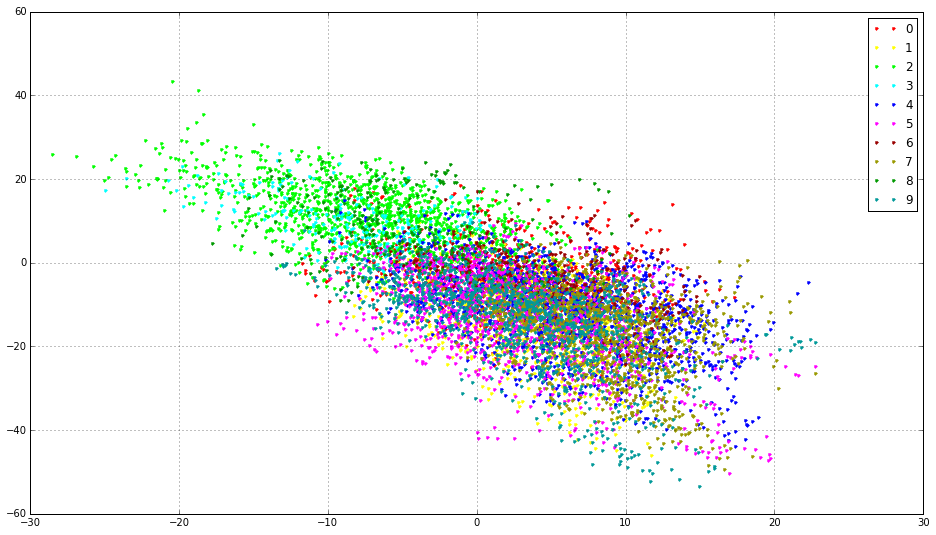

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
f = plt.figure(figsize=(16,9))
c = ['#ff0000', '#ffff00', '#00ff00', '#00ffff', '#0000ff', 
     '#ff00ff', '#990000', '#999900', '#009900', '#009999']
for i in range(10):
    plt.plot(data.ix[data.label == i,66], data.ix[data.label == i,32], '.', c=c[i])
plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.grid()
plt.show()

In [5]:
data.ix[data.label == i,1]

NameError: name 'data' is not defined

In [6]:
outs

NameError: name 'outs' is not defined

In [11]:
import numpy as np
import pandas as pd
caffe_root = '/home/dmitry/caffe_vis/'  
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe
from caffe.proto import caffe_pb2
import os 
import sys 
import lmdb
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.DataFrame()

data['label'] = np.array(outlabels)
data['name'] = np.array(outkeys)
data = data.join(pd.DataFrame(np.vstack(outs)))
del outlabels,outkeys,outs

In [87]:
data.head()
# name -- name of the file

label                        name          0         1          2  \
0    405  00000000_dr1_f_cjf0_si1027  10.728480 -2.850610  17.240946   
1    405  00000000_dr1_f_cjf0_si1027   9.090725 -0.532558  21.353724   
2    405  00000000_dr1_f_cjf0_si1027   8.424704 -3.347703  22.204855   
3    405  00000000_dr1_f_cjf0_si1027  11.509391 -2.226117  21.959579   
4    405  00000000_dr1_f_cjf0_si1027  11.686522 -2.575203  20.521637   

           3          4          5          6          7    ...      \
0  13.981629 -14.346214  -8.726022  14.884382 -10.052225    ...       
1  13.450876 -17.303158 -12.586283  15.668138  -8.311931    ...       
2  13.455737 -15.483478 -12.234453  15.724082  -7.433860    ...       
3  13.440734 -12.493149 -11.509278  15.567371  -6.785865    ...       
4  13.521736 -10.659394  -9.596851  17.262463  -6.634562    ...       

         452        453       454       455       456       457        458  \
0  -7.800043  22.762764 -6.111544 -0.536640 -9.429780 -1.897580  18.007683   
1 -11.337197  22.463640 -7.834042 -0.505687 -4.151864 -3.194126  15.070515   
2 -11.291259  25.473490 -7.061378 -0.921203 -7.363705 -1.267424  17.515181   
3  -9.802526  24.527090 -6.563479 -0.096156 -5.836164 -3.350981  15.904344   
4  -7.608096  23.452997 -6.875389 -1.256208 -9.105370 -3.988303  17.056202   

         459        460        461  
0  -7.919906  10.984777 -15.909306  
1 -13.492187  12.767691 -14.522504  
2 -10.794249  11.249556 -13.246007  
3 -12.433771  11.068455 -12.084782  
4  -9.884699   8.908676 -13.179989  

[5 rows x 464 columns]

00000000_dr1_f_cjf0_si1027
405


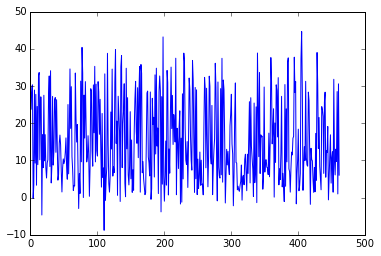

00000000_dr1_f_cjf0_sx217
405


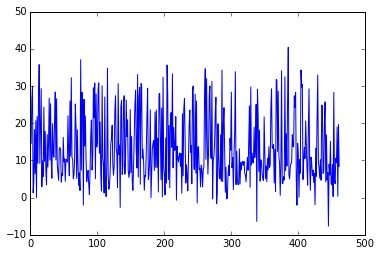

00000000_dr1_f_cjf0_sx37
405


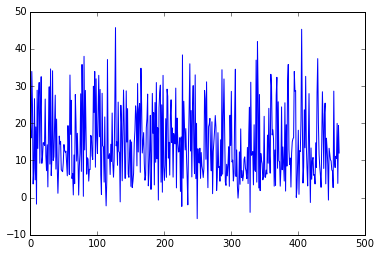

00000000_dr1_f_cjf0_sx397
405


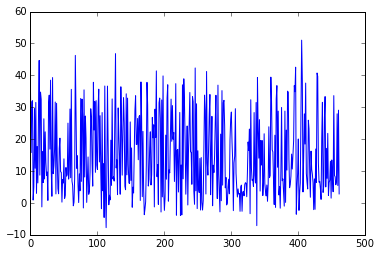

00000000_dr1_f_daw0_si1271
2


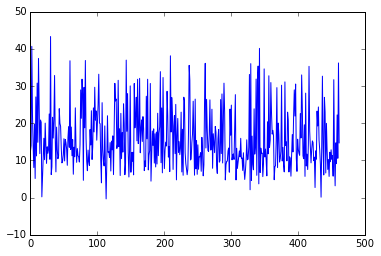

00000000_dr1_f_daw0_si1406
2


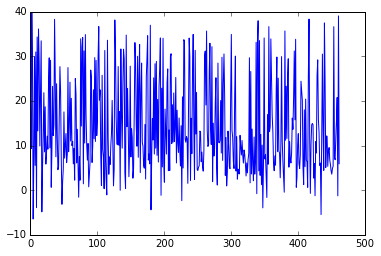

00000000_dr1_f_daw0_sx146
2


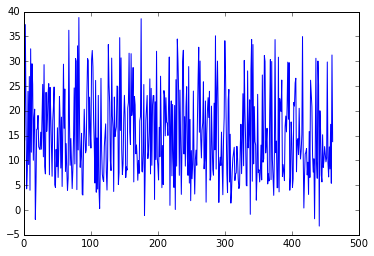

00000000_dr1_f_daw0_sx236
2


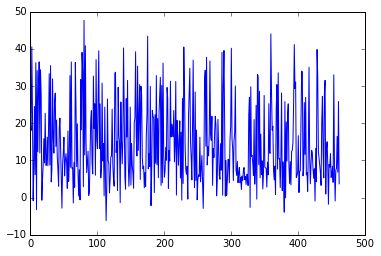

00000000_dr1_f_dml0_sa1
263


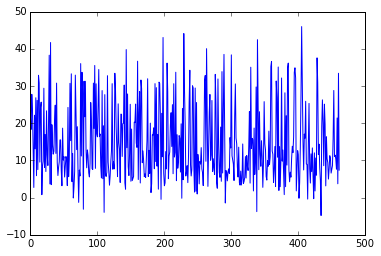

00000000_dr1_f_dml0_si1149
263


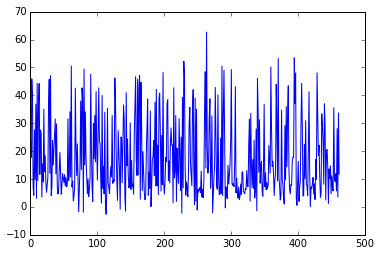

00000000_dr1_f_dml0_sx339
263


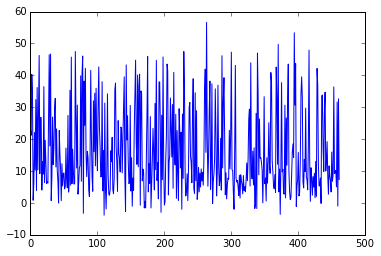

00000000_dr1_f_dml0_sx69
263


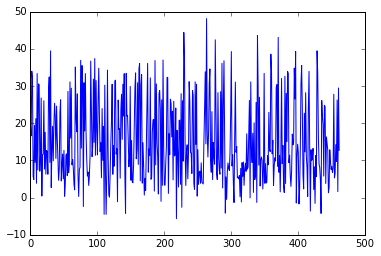

00000000_dr1_f_ecd0_sa2
268


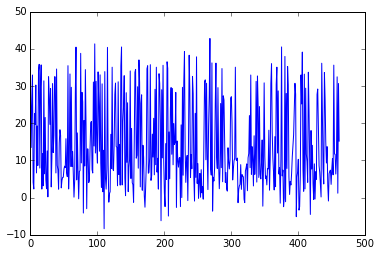

00000000_dr1_f_ecd0_sx338
268


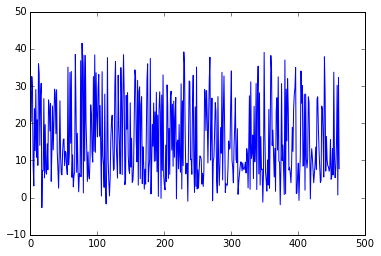

00000000_dr1_f_ecd0_sx428
268


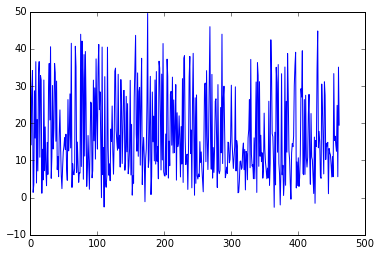

00000000_dr1_f_etb0_sa2
30


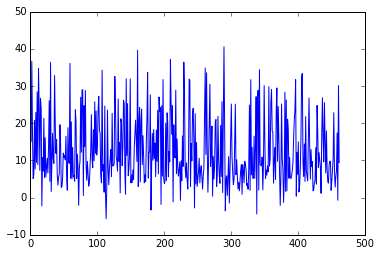

00000000_dr1_f_etb0_si1778
30


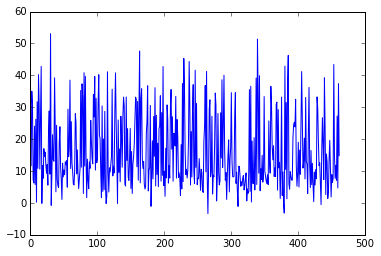

00000000_dr1_f_etb0_si518
30


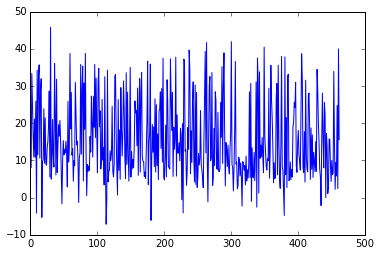

00000000_dr1_f_etb0_sx338
30


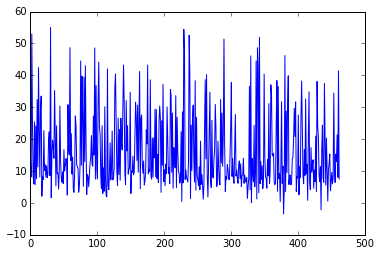

00000000_dr1_f_jsp0_si1763
217


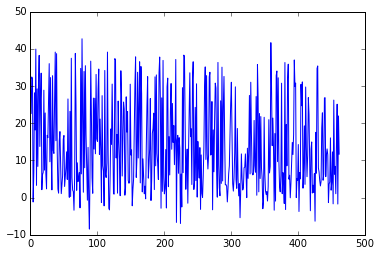

00000000_dr1_f_jsp0_sx444
217


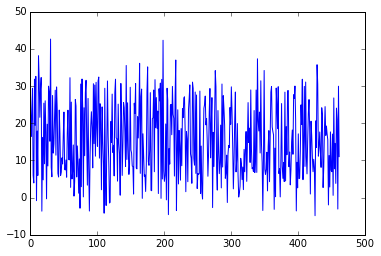

00000000_dr1_f_kfb0_si1608
271


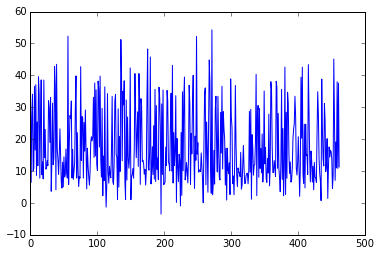

00000000_dr1_f_kfb0_si2238
271


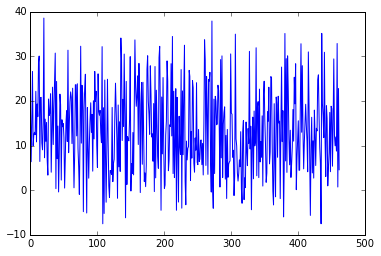

00000000_dr1_f_kfb0_si978
271


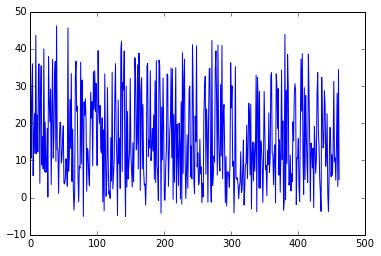

00000000_dr1_f_kfb0_sx168
271


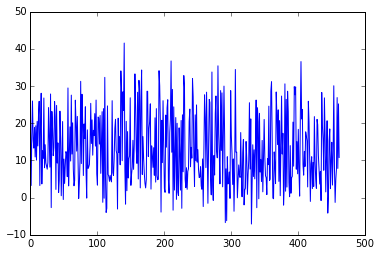

00000000_dr1_f_kfb0_sx78
271


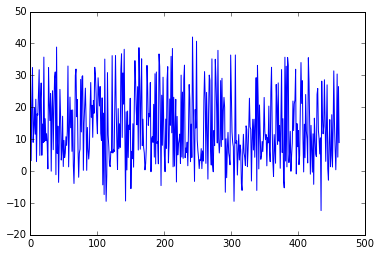

00000000_dr1_f_mem0_sa1
382


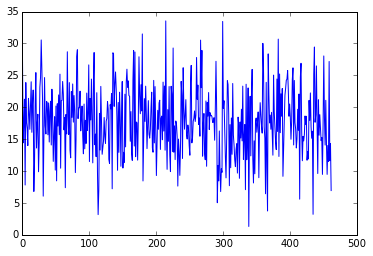

00000000_dr1_f_mem0_si1377
382


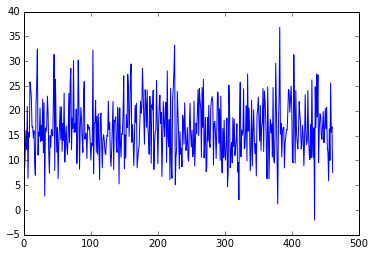

00000000_dr1_f_mem0_si747
382


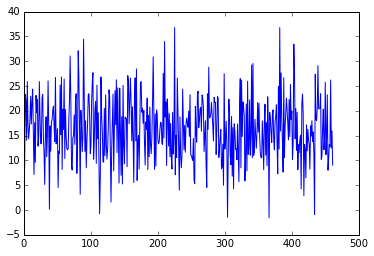

00000000_dr1_f_mem0_sx117
382


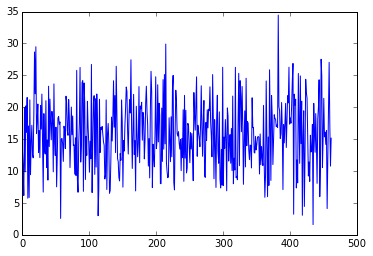

00000000_dr1_f_sjk1_si2285
94


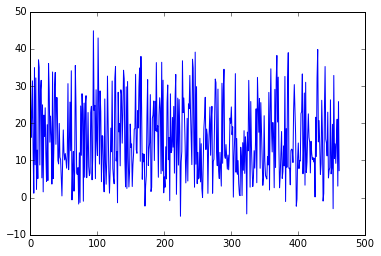

00000000_dr1_f_sjk1_si696
94


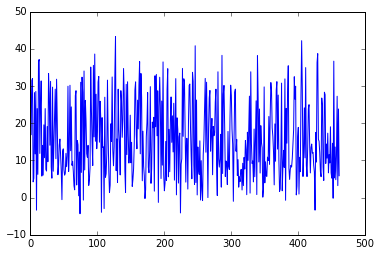

00000000_dr1_f_sjk1_sx35
94


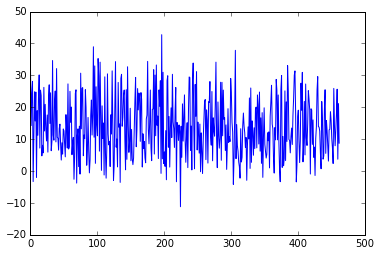

00000000_dr1_f_sma0_si991
385


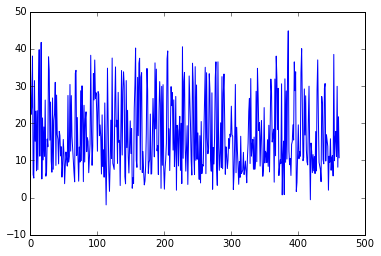

00000000_dr1_f_sma0_sx91
385


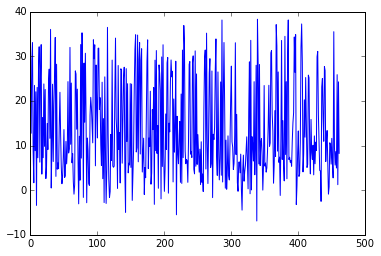

00000000_dr1_f_tbr0_sa1
242


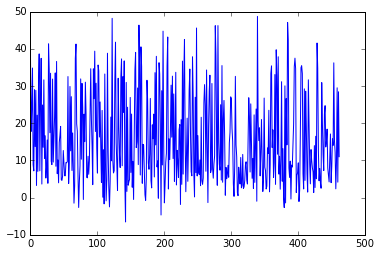

00000000_dr1_f_vfb0_sx42
192


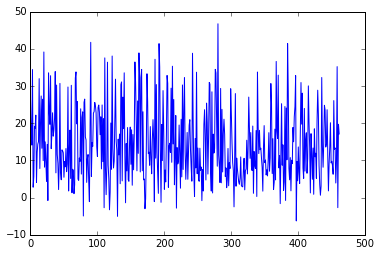

00000000_dr1_f_vmh0_sa2
126


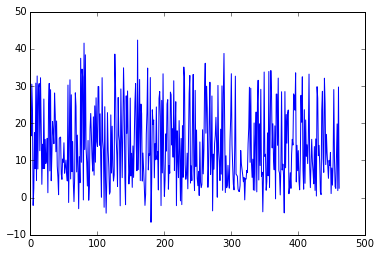

00000000_dr1_f_vmh0_sx116
126


KeyboardInterrupt: 

In [89]:
# Here is how we get average

import matplotlib.pyplot as plt
%matplotlib inline
g = data.groupby('name')
for name, group in g:
        print name 
        l =  group.reset_index().ix[0,'label']
        print l
        plt.figure()
        plt.plot(group.mean()[2:])
        plt.show()

In [105]:
#use cosine metric on that ? 

import matplotlib.pyplot as plt
import scipy
%matplotlib inline



g = data.groupby('name')

dvecs_from_files = []
labels= []
count = 0
for name, group in g:
        l = group['label'].iloc[0]
        enroll_size =  int(np.floor(group.shape[0]*70/100))
        enroll = group.reset_index().ix[:enroll_size]
        
        dvec_cur = enroll.mean()[2:]
        dvecs_from_files.append(dvec_cur)
        labels.append(l)
        count += 1 
print count 
dvec = pd.DataFrame()
dvec['label'] = lab

dvec = dvec.join(pd.DataFrame(np.vstack(dvecs_from_files)))
print dvec.head()
dvecd = dvec.groupby('label').mean()
print dvecd.columns

        
 

1154


AttributeError: 'Index' object has no attribute 'head'

In [114]:
np.vstack(dvecs_from_files).shape

(1154, 462)

In [157]:
scipy.spatial.distance.cdist(np.array([-1,232,-1]).reshape(1, -1),np.array([1,0,1]).reshape(1, -1),'cosine')

array([[ 1.00609563]])

In [7]:
def cos_cdist(matrix, vector):
    """
    Compute the cosine distances between each row of matrix and vector.
    """
    
    # (462,) to (1, 462)
    v = vector.reshape(1, -1)
    return scipy.spatial.distance.cdist(matrix, v, 'cosine')


for name, group in g:
        l =  group['label'].iloc[0]
        enroll_size =  int(np.floor(group.shape[0]*70/100))
         
        dvec = enroll.mean()[2:]
        
        test = group.reset_index().ix[enroll_size+1:,0:].mean()
      
        plt.plot(cos_cdist(dvecd,test))
   
        #plt.plot(scipy.spatial.distance.cdist(test.mean().values, dvecd , 'cosine'))
        plt.show()
        #for i in xrange(enroll_size+1,group.shape[0]):
        #    t = group[2:]
        #    scipy.spatial.distance.cosine(dvec)
        #print dvec.shape
        

NameError: name 'g' is not defined

In [86]:
outs[0][31]

0.47580576

In [ ]:
lmdb_env = lmdb.open(lmdb_path)  # equivalent to mdb_env_open()
lmdb_txn = lmdb_env.begin()  # equivalent to mdb_txn_begin()
lmdb_cursor = lmdb_txn.cursor()  # equivalent to mdb_cursor_open()
lmdb_cursor.first()  # equivalent to mdb_cursor_get()
    

net = caffe.Classifier(_deploy,_snapshot)
net.set_phase_test()
net.set_mode_gpu()

value = lmdb_cursor.value()
key = lmdb_cursor.key()

datum = caffe_pb2.Datum()
datum.ParseFromString(value)
            labels.append(datum.label)

            image = np.zeros((datum.channels, datum.height, datum.width))
            image = caffe.io.datum_to_array(datum)
            keys.append (key[:-6])
           
            batch[i,0] = image